# Machine Failures

### Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Exploratory data analysis
- Data Cleaning
- Data Pre-Processing
- Model Training
- Choose best model

### Dataset
The dataset we'll be using includes various features related to machine operations and failures. Each row represents a unique machine operation, and includes measurements such as air temperature, process temperature, rotational speed, and torque. It also includes a binary indicator of whether the machine failed during that operation, along with indicators for different types of failures.

### Objective
Our main objective is to build a predictive model that can accurately predict machine failures based on the provided features. We'll be using the AdaBoost model, a powerful machine learning model that combines multiple weak learners into a single strong learner.

### Domain Knowledge
This dataset is a rich source of information for understanding machine failure predictions. Let's break down the features and their potential implications:

### Features
- **id:** This is a unique identifier for each data entry in the dataset. It's useful for tracking individual data points but doesn't contribute to the predictive model.


- **Product ID:** This identifier for the specific product/machine could be useful in identifying if certain machines are more prone to failure than others.


- **Type:** The type of machine or equipment could influence the likelihood of failure. Different types of machines may have different failure rates.


- **Air temperature [K] and Process temperature [K]:** The temperatures of the air and the machine during the process could be critical in predicting machine failure. Overheating is a common cause of machine failure.


- **Rotational speed [rpm]:** The speed of rotation of the machine could also be a factor in machine failure. Machines running at high speeds may be more likely to fail.


- **Torque [Nm]:** The rotational or twisting force applied by the machine could contribute to wear and tear, leading to machine failure.


- **Tool wear [min]:** The duration of tool usage could be a strong predictor of machine failure. Tools that have been used for longer periods are more likely to fail.


- **Machine failure:** This is our target variable. It's a binary indicator representing whether the machine experienced failure or not.


- **TWF (Tool Wear Failure), HDF (Heat Dissipation Failure), PWF (Power Failure), OSF (Overstrain Failure), RNF (Random Failure):** These binary indicators for different types of failures provide detailed information about the nature of the machine failures. They could be useful in building a more nuanced predictive model.

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
df = pd.read_csv('Data/train.csv')

X_test=pd.read_csv('Data/test.csv')

In [ ]:
# Show Top 3 Records

df.head(3)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0


In [ ]:
# Show Top 3 Records

X_test.head(3)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0


In [ ]:
# Shape of the dataset

df.shape

(136429, 14)

In [ ]:
# Shape of the dataset

X_test.shape

(90954, 13)

In [ ]:
# info() is used to check the Information about the data and the datatypes of each respective attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       90954 non-null  int64  
 1   Product ID               90954 non-null  object 
 2   Type                     90954 non-null  object 
 3   Air temperature [K]      90954 non-null  float64
 4   Process temperature [K]  90954 non-null  float64
 5   Rotational speed [rpm]   90954 non-null  int64  
 6   Torque [Nm]              90954 non-null  float64
 7   Tool wear [min]          90954 non-null  int64  
 8   TWF                      90954 non-null  int64  
 9   HDF                      90954 non-null  int64  
 10  PWF                      90954 non-null  int64  
 11  OSF                      90954 non-null  int64  
 12  RNF                      90954 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 9.0+ MB


In [ ]:
df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [ ]:
# Display basic statistics of the dataset
df.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Summary Insight**
- The dataset contains `136,429` records with features such as temperatures, rotational speed, torque, and tool wear.
- The target variable, "Machine failure", and specific failure types (TWF, HDF, PWF, OSF, RNF) are binary indicators.
- The air temperature ranges from `295.3K` to `304.4K`, with a mean of approximately `299.9K`.
- The process temperature ranges from 305.8K to 313.8K, with a mean of approximately `309.9K`.
- The rotational speed varies from `1,181 rpm` to `2,886 rpm`, with a mean of about `1,520 rpm`.
- Torque ranges from `3.8 Nm` to `76.6 Nm`, with a mean of `40.3 Nm`.
- Tool wear spans from `0` to `253 minutes`, with an average of about `104.4 minutes`.

In [ ]:
# Check for missing values for train data
missing_values = df.isnull().sum()
print(missing_values)

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


In [ ]:
# Check for missing values for test data
missing_values = X_test.isnull().sum()
print(missing_values)

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


In [ ]:
# Check for duplicate rows for train data
duplicates = df.duplicated()
print(f'Total duplicate rows: {duplicates.sum()}')

Total duplicate rows: 0


In [ ]:
# # Check for duplicate rows for test data
duplicate_rows_data = X_test[X_test.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_data.shape)

Number of duplicate rows:  (0, 13)


In [ ]:
# # Drop the 'id' and 'Product ID' columns from the DataFrame as they are not useful for prediction

df1 = df.drop(['id','Product ID'], axis=1)

X_test = X_test.drop(['id','Product ID'], axis=1)

In [ ]:
df1.shape

(136429, 12)

**Seperating numerical & categorical columns**

In [ ]:
numeric_features = [feature for feature in df1.columns if df1[feature].dtype != 'O']
categorical_features = [feature for feature in df1.columns if df1[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 11 numerical features : ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

We have 1 categorical features : ['Type']


### Univariate Analysis
- Examine the distribution of each feature.

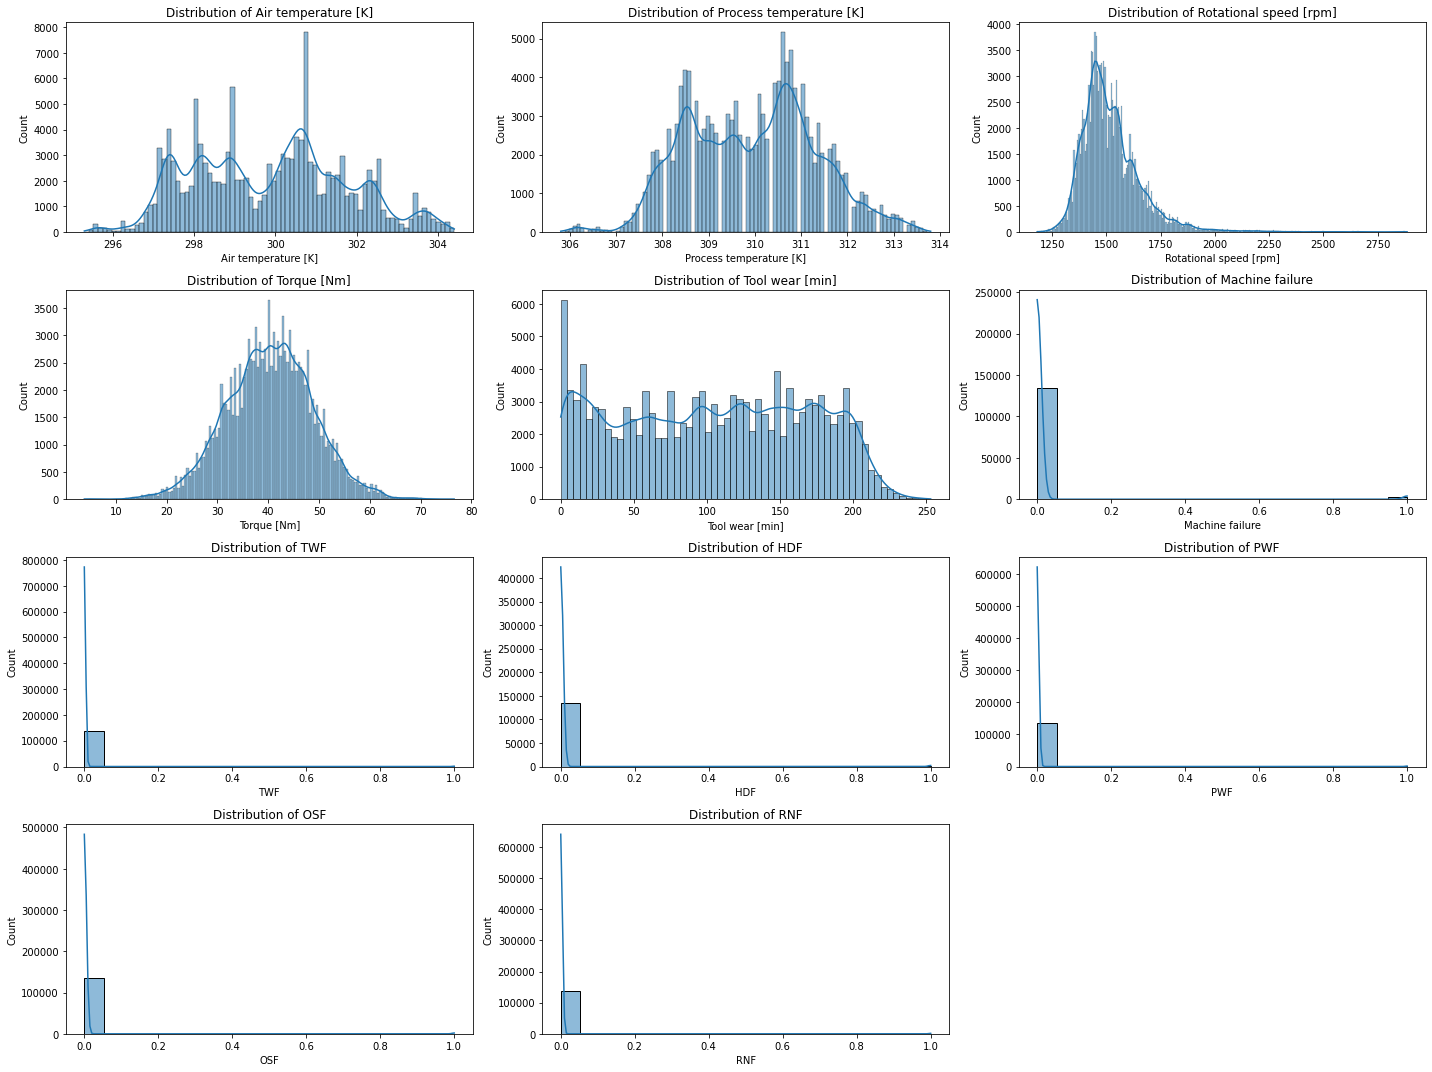

In [ ]:
# Plot histograms for numerical features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df1[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

**Here are some of the insights:**

- The air temperature appears to fluctuate around 300 Kelvin over time.
- The process temperature appears to increase over time.
- The rotational speed appears to fluctuate over time. There is a peak at around 1750 rpm and another peak at around 2500 rpm.
- The torque appears to fluctuate around 30 Nm over time.

- **Examine the distribution of each categorical feature.**

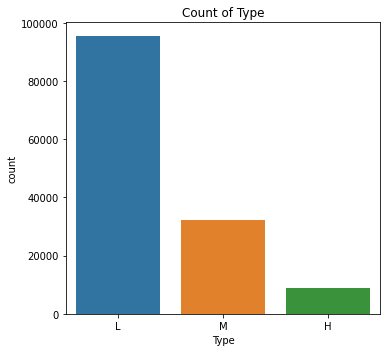

In [ ]:
# Plot count plots for categorical features
plt.figure(figsize=(10, 5))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 2, i)
    sns.countplot(data=df1, x=feature)
    plt.title(f'Count of {feature}')

plt.tight_layout()
plt.show()

### Bivariate Analysis

**Explore relationships between the target variable (machine failure) and other features.**

- Numerical Features vs. Target

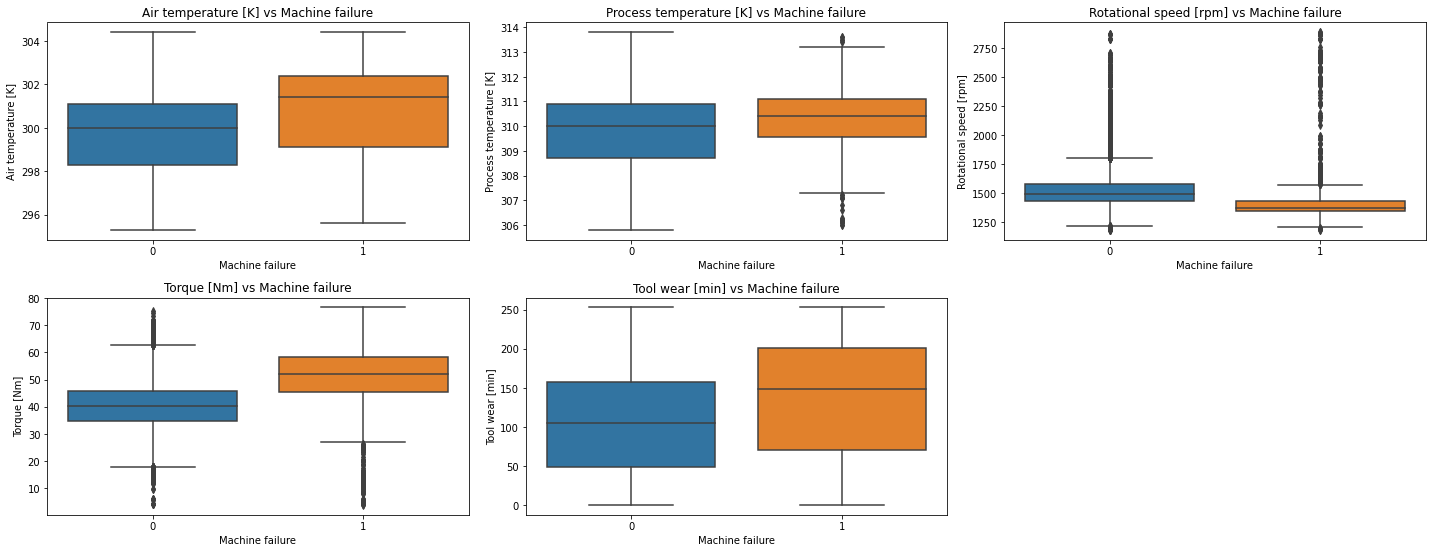

In [ ]:
# Plot boxplots for numerical features against the target variable
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numeric_features[:-6], 1):  # Exclude binary failure types for now
    plt.subplot(4, 3, i)
    sns.boxplot(x='Machine failure', y=feature, data=df1)
    plt.title(f'{feature} vs Machine failure')

plt.tight_layout()
plt.show()

- **Categorical Features vs. Target**

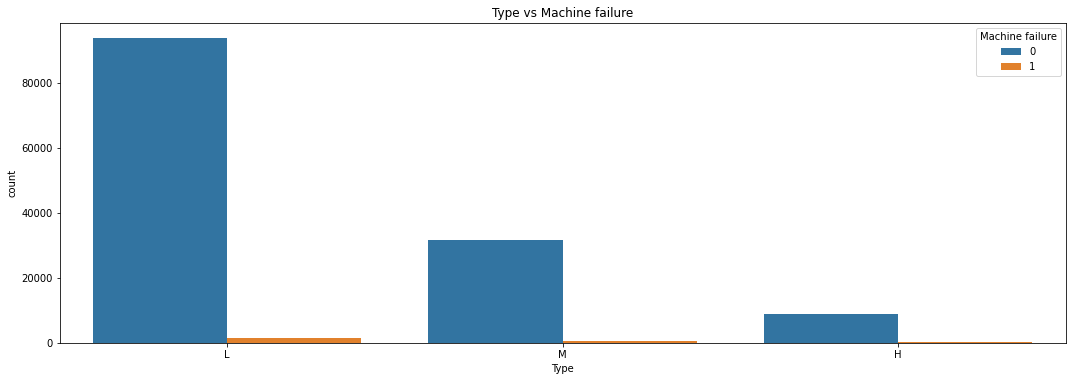

In [ ]:
# Plot count plots for failure types against the target variable
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 1, i)
    sns.countplot(data=df1, x=feature, hue='Machine failure')
    plt.title(f'{feature} vs Machine failure')

plt.tight_layout()
plt.show()

- Our data is Highly Imblanced

### Multivariate Analysis

**Investigate interactions between multiple features.**

- Heatmap for Correlation Matrix
> A heatmap for the correlation matrix is a visual representation of the correlation coefficients between variables in a dataset. It helps to quickly identify the strength and direction of relationships between variables.

- The correlation coefficient (r) ranges from -1 to 1.
- +1 indicates a perfect positive correlation: as one variable increases, the other variable increases.
- -1 indicates a perfect negative correlation: as one variable increases, the other variable decreases.
- 0 indicates no correlation: no linear relationship between the variables.

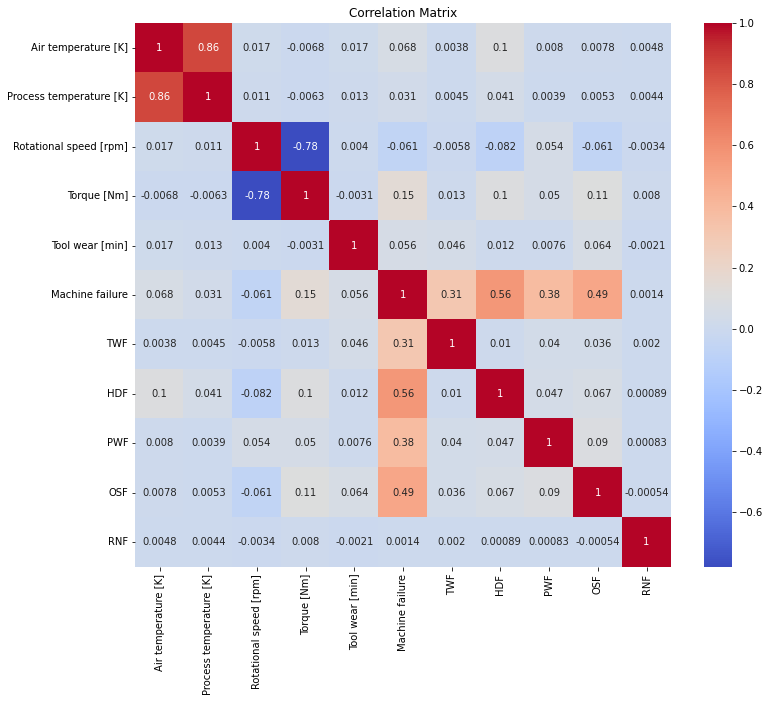

In [ ]:
# Heatmap for correlation matrix
corr_matrix = df1[numeric_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Correlation Analysis
**Determine correlations between numerical features and the target variable.**

In [ ]:
# Calculate correlation with target variable
correlation_with_target = df1.corr()['Machine failure'].sort_values(ascending=False)
print(correlation_with_target)

Machine failure            1.000000
HDF                        0.564507
OSF                        0.494668
PWF                        0.383941
TWF                        0.311919
Torque [Nm]                0.145793
Air temperature [K]        0.067744
Tool wear [min]            0.056448
Process temperature [K]    0.030966
RNF                        0.001428
Rotational speed [rpm]    -0.060868
Name: Machine failure, dtype: float64


**Insights**
- `Strong positive` correlations were observed between machine failure and specific failure types, including HDF (Heat Dissipation Failure), OSF (Overstrain Failure), and PWF (Power Failure). These failure types are strongly associated with overall machine failure occurrences.
- A `moderate positive` correlation was found between machine failure and TWF (Tool Wear Failure), indicating that tool wear failures contribute to the likelihood of machine failures.
- `Weak positive` correlations were identified between machine failure and features such as Torque [Nm], Air temperature [K], Tool wear [min], and Process temperature [K]. While these correlations exist, their influence on machine failure occurrences is relatively weak.
- A `weak negative` correlation was observed between machine failure and Rotational speed [rpm], suggesting that higher rotational speeds may slightly decrease the likelihood of machine failures.


### Failure Type Analysis
**Examine the distribution and relationships of different failure types.**

- Distribution of Failure Types

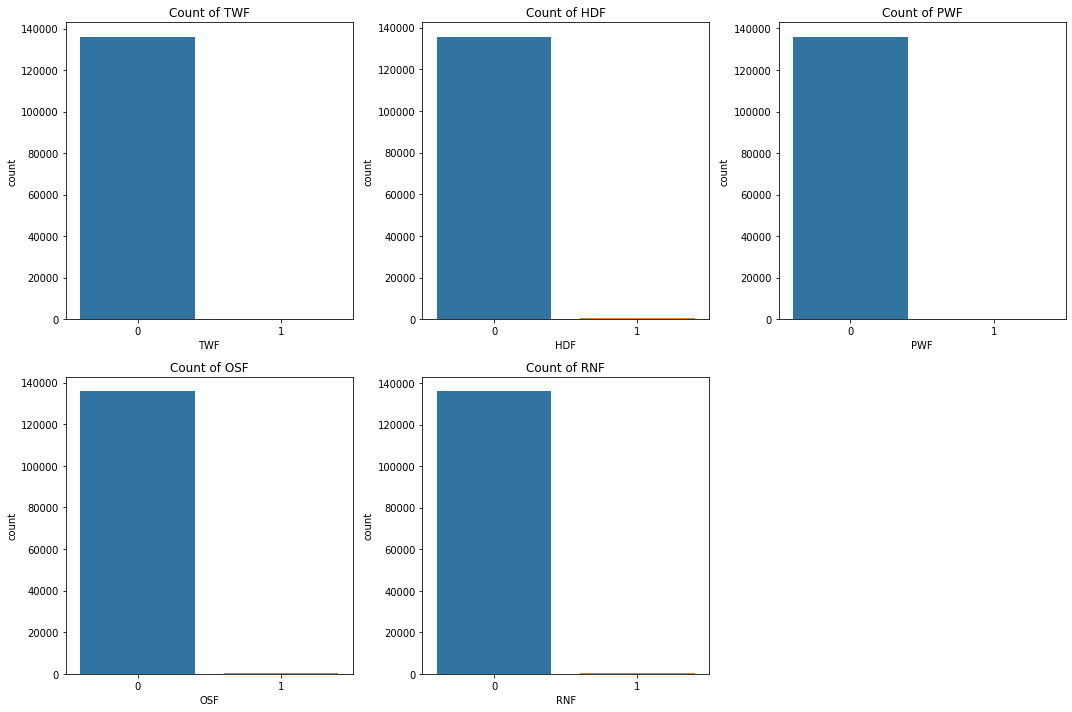

In [ ]:
# Plot the distribution of failure types
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(failure_types, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df1, x=feature)
    plt.title(f'Count of {feature}')

plt.tight_layout()
plt.show()

- Failure Types vs. Numerical Features

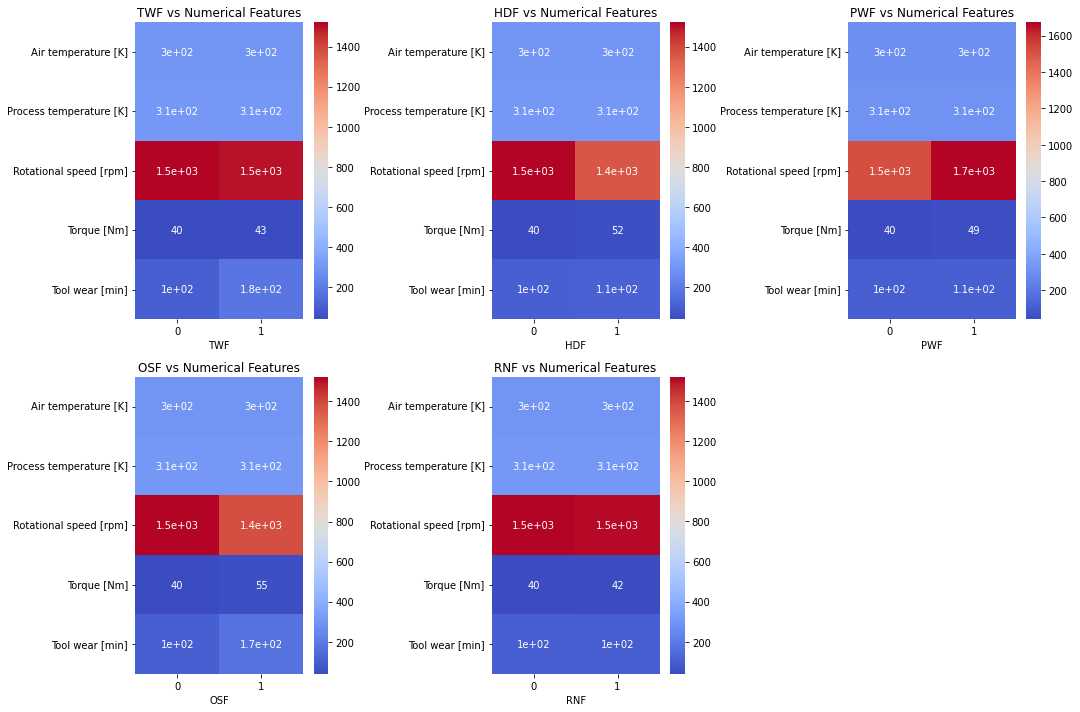

In [ ]:
# Correlation between failure types and numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(failure_types, 1):
    plt.subplot(2, 3, i)
    sns.heatmap(df1.groupby(feature)[numeric_features[:-6]].mean().T, annot=True, cmap='coolwarm')
    plt.title(f'{feature} vs Numerical Features')

plt.tight_layout()
plt.show()

**Insights**
- These features likely represent different failure modes in a machine.
- The top left chart titled `TWF vs Numerical Features` shows the distribution of air temperature (on the y-axis) for machine failures categorized as TWF (Tool Wear Failure).
- It is difficult to make specific comparisons between the failure modes (TWF, HDF, PWF, OSF, RNF) because the x-axis titles (Air temperature, Process temperature, Rotational speed, Torque, Tool wear) are not consistent across the charts.

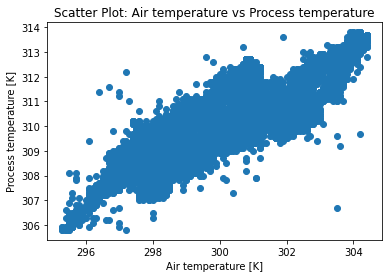

In [ ]:
# Scatter Plot: Relationship between Air temperature and Process temperature.
plt.scatter(df1['Air temperature [K]'], df1['Process temperature [K]'])
plt.xlabel('Air temperature [K]')
plt.ylabel('Process temperature [K]')
plt.title('Scatter Plot: Air temperature vs Process temperature')
plt.show()

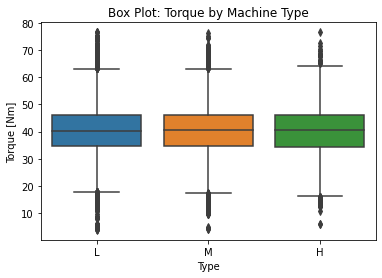

In [ ]:
# Box Plot: Distribution of Torque for each type of machine.
sns.boxplot(x='Type', y='Torque [Nm]', data=df1)
plt.xlabel('Type')
plt.ylabel('Torque [Nm]')
plt.title('Box Plot: Torque by Machine Type')
plt.show()

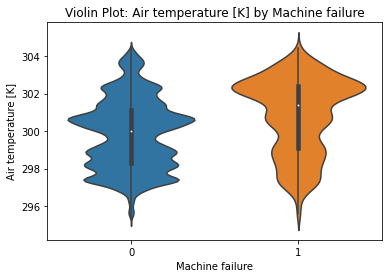

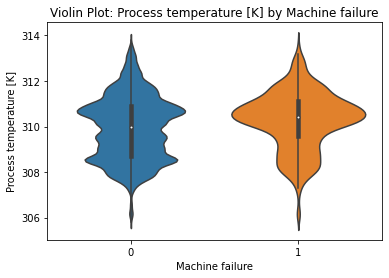

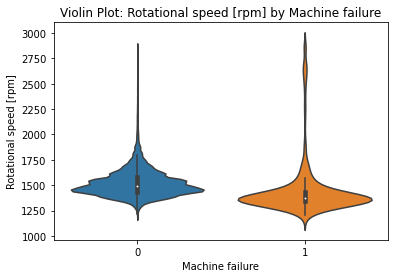

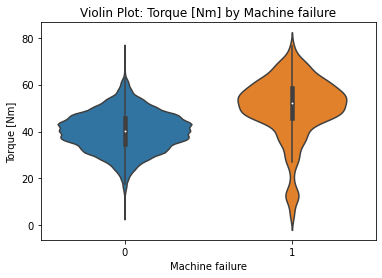

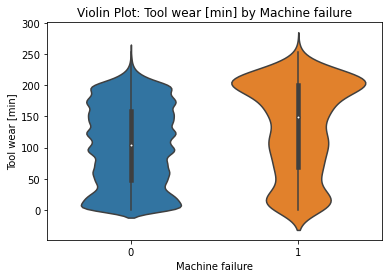

In [ ]:
#Violin Plot: Distribution of Machine failure.
numerical_vars = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

for var in numerical_vars:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x='Machine failure', y=var, data=df1)
    plt.xlabel('Machine failure')
    plt.ylabel(var)
    plt.title(f'Violin Plot: {var} by Machine failure')
    plt.show()

**Summary Insights**

The violin plots provide a comparison of the distributions of numeric variables for different machine failure states. The two categories represented are `No Failure` and `Failure`.

**Air temperature [K]**

- The distribution of air temperature for machines that have experienced `failure` tends to be **higher** compared to those that have not. This could suggest that higher air temperatures are associated with machine failure.

**Process temperature [K]**

- The distribution of process temperature for machines that have experienced `failure` is also **higher**. This could indicate that higher process temperatures are associated with machine failure.

**Rotational speed [rpm]**

- The distribution of rotational speed for machines that have experienced `failure` appears to be **lower**. This could suggest that lower rotational speeds are associated with machine failure.

**Torque [Nm]**

- The distribution of torque for machines that have experienced `failure` is **higher**. This could suggest that higher torque is associated with machine failure.

**Tool wear [min]**

- The distribution of tool wear for machines that have experienced `failure` is **higher**. This could suggest that longer tool usage is associated with machine failure.

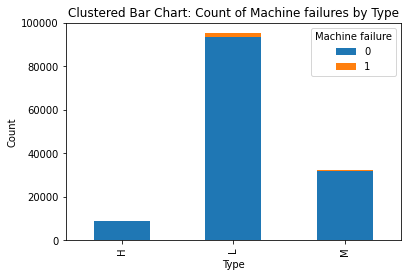

In [ ]:
#Clustered Bar Chart: Count of Machine failures by Type.
df1.groupby(['Type', 'Machine failure']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Clustered Bar Chart: Count of Machine failures by Type')
plt.show()

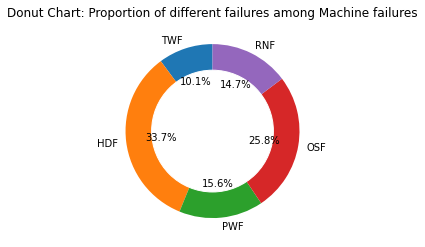

In [ ]:
# Donut Chart: Proportion of different failures among Machine failures.
failure_counts = df1[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum()
plt.pie(failure_counts, labels=failure_counts.index, autopct='%1.1f%%', startangle=90)
circle = plt.Circle((0, 0), 0.7, color='white')
plt.gca().add_artist(circle)
plt.title('Donut Chart: Proportion of different failures among Machine failures')
plt.show()

**Summary Insights**

> The donut chart provides a comparison of the proportion of different types of failures among machine failures.

From the donut chart, we can observe the following:

**1. TWF (Tool Wear Failure) 🔧**
- The proportion of `tool wear failures` among machine failures is represented by the corresponding segment in the donut chart. There are a total of 208 tool wear failures.

**2. HDF (Heat Dissipation Failure)**
- The proportion of `heat dissipation failures` among machine failures is represented by the corresponding segment in the donut chart. There are a total of 701 heat dissipation failures.

**3. PWF (Power Failure)**
- The proportion of `power failures` among machine failures is represented by the corresponding segment in the donut chart. There are a total of 320 power failures.

**OSF (Overstrain Failure)**
- The proportion of `overstrain failures` among machine failures is represented by the corresponding segment in the donut chart. There are a total of 533 overstrain failures.

**RNF (Random Failure)**
- The proportion of `random failures` among machine failures is represented by the corresponding segment in the donut chart. There are a total of 306 random failures.

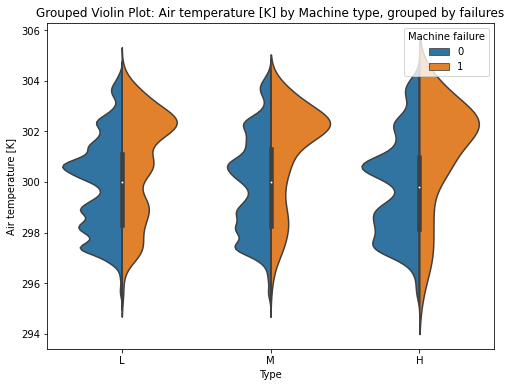

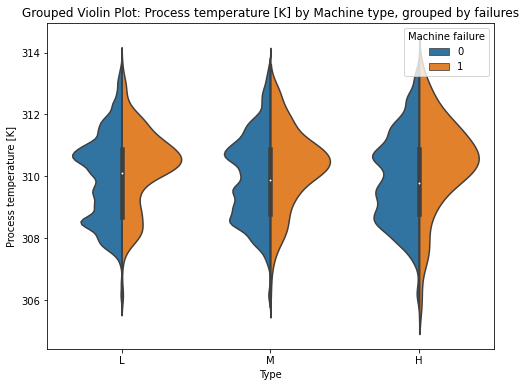

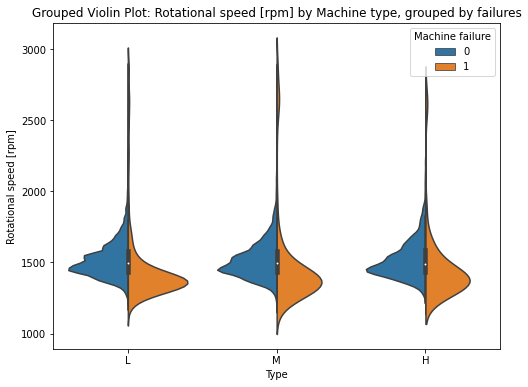

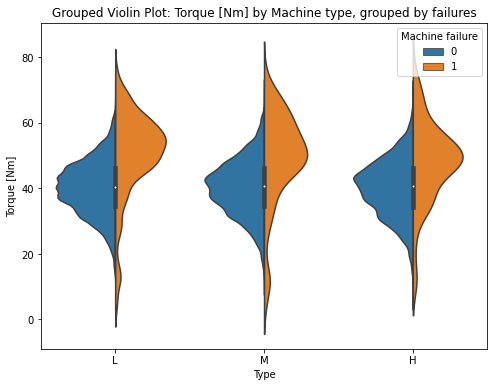

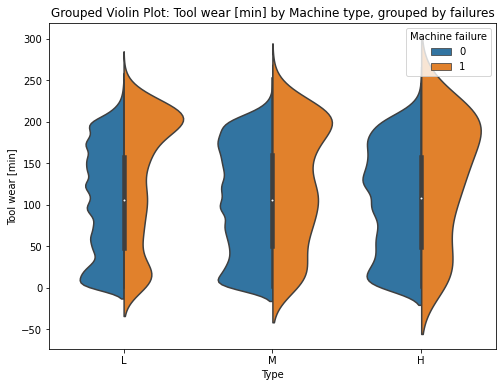

In [ ]:
# Grouped Violin Plot: Distribution of Tool wear duration by Machine type, grouped by different failures.
numerical_vars = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Type', y=var, hue='Machine failure', split=True, data=df1)
    plt.xlabel('Type')
    plt.ylabel(var)
    plt.title(f'Grouped Violin Plot: {var} by Machine type, grouped by failures')
    plt.show()

**Summary Insights**

The grouped violin plots provide a comparison of the distributions of numeric variables for different machine failure states, grouped by machine type. The two categories represented are `No Failure` and `Failure`.

**1. Air temperature [K]**
- The distribution of air temperature for machines that have experienced `failure` tends to be `higher` compared to those that have not. This pattern is observed across different machine types. This could suggest that higher air temperatures are associated with machine failure, regardless of the machine type.

**2. Process temperature [K]**
- The distribution of process temperature for machines that have experienced `failure` is also `higher`, across different machine types. This could indicate that higher process temperatures are associated with machine failure, regardless of the machine type.

**3. Rotational speed [rpm]**
- The distribution of rotational speed for machines that have experienced `failure` appears to be `lower`, across different machine types. This could suggest that lower rotational speeds are associated with machine failure, regardless of the machine type.

**4. Torque [Nm]**
- The distribution of torque for machines that have experienced `failure` is `higher`, across different machine types. This could suggest that higher torque is associated with machine failure, regardless of the machine type.

**5. Tool wear [min]**
- The distribution of tool wear for machines that have experienced `failure` is `higher`, across different machine types. This could suggest that longer tool usage is associated with machine failure, regardless of the machine type.

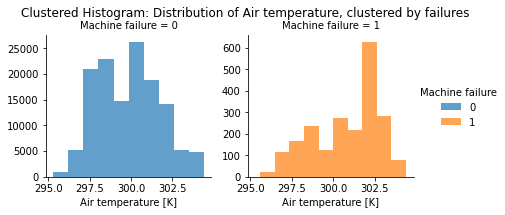

In [ ]:
#Clustered Histogram: Distribution of Air temperature and Process temperature, clustered by different failures.
g = sns.FacetGrid(df1, col='Machine failure', hue='Machine failure', sharey=False)
g.map(plt.hist, 'Air temperature [K]', alpha=0.7)
g.add_legend()
g.fig.suptitle('Clustered Histogram: Distribution of Air temperature, clustered by failures')
plt.subplots_adjust(top=0.85)
plt.show()

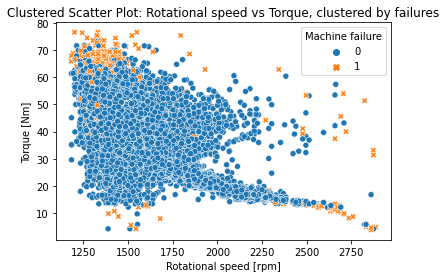

In [ ]:
# Clustered Scatter Plot: Relationship between Rotational speed and Torque, clustered by different failures.
sns.scatterplot(x='Rotational speed [rpm]', y='Torque [Nm]', hue='Machine failure', style='Machine failure', data=df1)
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Torque [Nm]')
plt.title('Clustered Scatter Plot: Rotational speed vs Torque, clustered by failures')
plt.show()

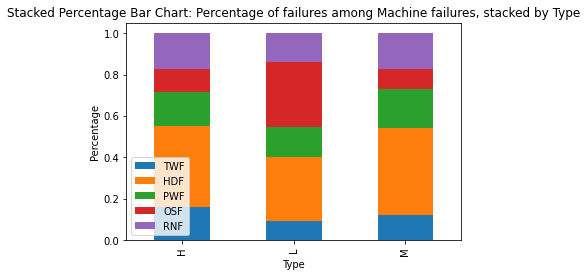

In [ ]:
# Stacked Percentage Bar Chart: Percentage of different failures among Machine failures, stacked by Type.
failure_counts_by_type = df1.groupby('Type')[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum()
failure_counts_by_type.div(failure_counts_by_type.sum(axis=1), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Type')
plt.ylabel('Percentage')
plt.title('Stacked Percentage Bar Chart: Percentage of failures among Machine failures, stacked by Type')
plt.show()